In [143]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import cross_val_score
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

# Features

In [144]:
set(train_df.columns)

{'Age',
 'Cabin',
 'Embarked',
 'Fare',
 'Name',
 'Parch',
 'PassengerId',
 'Pclass',
 'Sex',
 'SibSp',
 'Survived',
 'Ticket'}

# Title

Extract title from name and make a new feature

In [145]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',
                                                 'Don', 'Dr', 'Major', 'Rev', 'Sir', 
                                                 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs') 

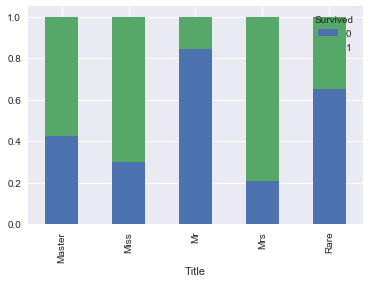

In [146]:
tab = pd.crosstab(train_df['Title'], train_df['Survived'])
dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)

In [147]:
titles = ['Master', 'Miss', 'Mr', 'Mrs', 'Rare']
for dataset in combine:
    for t in titles:
        dataset[t] = dataset['Title'] == t

# SibSp and Parch

In [148]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch']

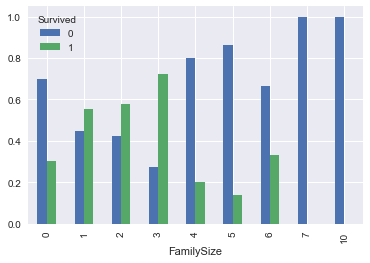

In [149]:
tab = pd.crosstab(train_df['FamilySize'], train_df['Survived'])
dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind='bar')

In [150]:
train_df.groupby(['FamilySize'])['Survived'].agg(['mean', 'count'])

,mean,count
FamilySize,,
0,0.303538,537
1,0.552795,161
2,0.578431,102
3,0.724138,29
4,0.200000,15
5,0.136364,22
6,0.333333,12
7,0.000000,6
10,0.000000,7


In [151]:
for dataset in combine:
    dataset['GoodFamilySize'] = dataset['FamilySize'].apply(lambda x: x in [1, 2, 3])
    dataset['BadFamilySize'] = dataset['FamilySize'] > 6
    dataset['IsAlone'] = dataset['FamilySize'] == 0

# Cabin

In [152]:
for dataset in combine:
    dataset['Cabin'] = dataset['Cabin'].fillna(value='U')
    dataset['Cabin'] = dataset['Cabin'].str[0]

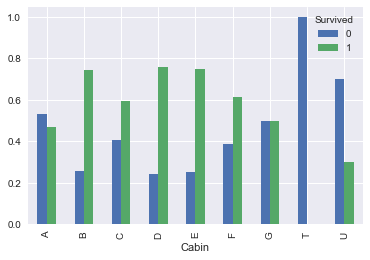

In [153]:
tab = pd.crosstab(train_df['Cabin'], train_df['Survived'])
dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind='bar')

In [154]:
train_df.groupby(['Cabin'])['Survived'].agg(['mean', 'count'])

,mean,count
Cabin,,
A,0.466667,15
B,0.744681,47
C,0.593220,59
D,0.757576,33
E,0.750000,32
F,0.615385,13
G,0.500000,4
T,0.000000,1
U,0.299854,687


In [155]:
for dataset in combine:
    dataset['GoodCabin'] = dataset['Cabin'].apply(lambda x: x in ['B','D','E'])
    dataset['BadCabin'] = dataset['Cabin'].apply(lambda x: x in ['U'])

# Ticket

In [156]:
from collections import Counter
ticket_Counter = Counter(train_df['Ticket'])

In [157]:
for dataset in combine:
    dataset['SharedTicket'] = dataset['Ticket'].apply(lambda x: ticket_Counter[x] > 1)

In [158]:
from collections import defaultdict
ticket_survival = defaultdict(list)
for i in train_df.index:
    ticket_number = train_df.loc[i, 'Ticket']
    if ticket_Counter[ticket_number] == 1:
        continue
    else:
        survived = train_df.loc[i, 'Survived']
        ticket_survival[ticket_number].append(survived)

In [159]:
ticket_survival_rate = dict()
for t in ticket_survival:
    ticket_survival_rate[t] = np.mean(ticket_survival[t])

In [160]:
lucky_ticket = set()
unlucky_ticket = set()
for t in ticket_survival_rate:
    if ticket_survival_rate[t] >= 0.5:
        lucky_ticket.add(t)
    elif ticket_survival_rate[t] < 0.5:
        unlucky_ticket.add(t)

In [161]:
for dataset in combine:
    dataset['LuckyTicket'] = dataset['Ticket'].apply(lambda x: x in lucky_ticket)
    dataset['UnluckyTicket'] = dataset['Ticket'].apply(lambda x: x in unlucky_ticket)

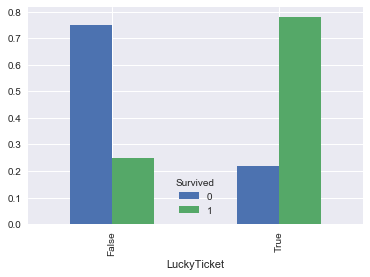

In [162]:
tab = pd.crosstab(train_df['LuckyTicket'], train_df['Survived'])
dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind='bar')

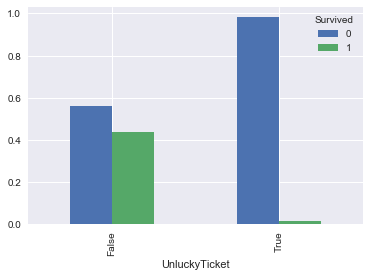

In [163]:
tab = pd.crosstab(train_df['UnluckyTicket'], train_df['Survived'])
dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind='bar')

In [164]:
train_df.groupby(['UnluckyTicket', 'LuckyTicket'])['Survived'].agg(['mean', 'count'])

mean  count
UnluckyTicket LuckyTicket                 
False         False        0.297989    547
              True         0.779736    227
True          False        0.017094    117

# Sex

In [165]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female':0, 'male':1})

# Embark

In [166]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    dataset['Embarked_Q'] = dataset['Embarked'].apply(lambda x: x == 'Q')
    dataset['Embarked_C'] = dataset['Embarked'].apply(lambda x: x == 'C')
    dataset['Embarked_S'] = dataset['Embarked'].apply(lambda x: x == 'S')

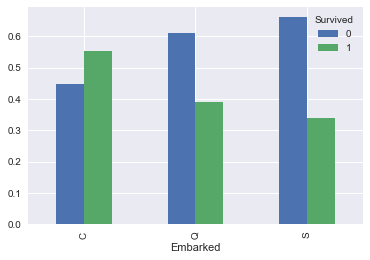

In [167]:
tab = pd.crosstab(train_df['Embarked'], train_df['Survived'])
dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind='bar')

In [168]:
train_df.groupby(['Embarked'])['Survived'].agg(['mean', 'count'])

,mean,count
Embarked,,
C,0.553571,168
Q,0.389610,77
S,0.339009,646


# Pclass

In [169]:
for dataset in combine:
    dataset['Pclass_1'] = dataset['Pclass'] == 1
    dataset['Pclass_2'] = dataset['Pclass'] == 2
    dataset['Pclass_3'] = dataset['Pclass'] == 3

In [170]:
train_df.groupby(['Sex', 'Pclass'])['Survived'].agg(['mean', 'count'])

mean  count
Sex Pclass                 
0   1       0.968085     94
    2       0.921053     76
    3       0.500000    144
1   1       0.368852    122
    2       0.157407    108
    3       0.135447    347

In [171]:
for dataset in combine:
    dataset.loc[(dataset['Pclass']<=2)&(dataset['Sex']==0), 'UpperClassLady'] = True
    dataset.loc[(dataset['Pclass']>2)|(dataset['Sex']==1), 'UpperClassLady'] = False

In [270]:
for dataset in combine:
    dataset.loc[(dataset['Pclass']>=2)&(dataset['Sex']==1), 'UnderDog'] = True
    dataset.loc[(dataset['Pclass']<2)|(dataset['Sex']==0), 'UnderDog'] = False

In [271]:
train_df[(train_df['UpperClassLady'] == True)].groupby(['Sex'])['Survived'].agg(['mean','count'])

,mean,count
Sex,,
0,0.947059,170


In [272]:
train_df[(train_df['UnderDog'] == True)].groupby(['Sex'])['Survived'].agg(['mean','count'])

,mean,count
Sex,,
1,0.140659,455


# Fare

In [173]:
test_df['Fare'] = test_df['Fare'].fillna(np.mean(test_df['Fare']))

In [174]:
from math import log2
for dataset in combine:
    dataset.loc[dataset['Fare'] == 0, 'Fare'] = 1
    dataset['LogFare'] = dataset['Fare'].apply(log2)

In [175]:
for dataset in combine:
    dataset['IntFare'] = dataset['LogFare'].apply(int)

In [176]:
train_df.groupby(['IntFare', 'Pclass'])['Survived'].agg(['count', 'mean'])

count      mean
IntFare Pclass                 
0       1           5  0.000000
        2           6  0.000000
        3           4  0.250000
2       1           1  0.000000
        3         225  0.226667
3       2          92  0.391304
        3         151  0.258278
4       1          51  0.529412
        2          64  0.609375
        3          81  0.283951
5       1          55  0.545455
        2          15  0.666667
        3          23  0.217391
6       1          66  0.772727
        2           7  0.285714
        3           7  0.000000
7       1          29  0.724138
8       1           6  0.666667
9       1           3  1.000000

In [177]:
for dataset in combine:
    dataset.loc[(dataset['Pclass'] == 1)&(dataset['IntFare']>=6), 'WealthyPeople'] = True
    dataset.loc[(dataset['Pclass'] != 1)|(dataset['IntFare']<6), 'WealthyPeople'] = False

# Age

In [178]:
# age_df = train_df[train_df['Age'].isnull()==False].append(test_df[test_df['Age'].isnull()==False]).copy()
# pd.qcut(age_df['Age'], 3)

In [179]:
# young_median = age_df[age_df['Age'] <= 23]['Age'].mean()
# middle_median = age_df[(age_df['Age'] <= 34) & (age_df['Age'] > 23)]['Age'].mean()
# old_median = age_df[(age_df['Age'] > 34) & (age_df['Age'] <= 80)]['Age'].mean()

In [180]:
# young_median, middle_median, old_median

In [181]:
# for dataset in combine:
#     dataset.loc[(dataset['Age'].isnull()==False)&(dataset['Age']<=23), 'Age'] = 0
#     dataset.loc[(dataset['Age'].isnull()==False)&(dataset['Age']>23)&(dataset['Age']<=34), 'Age'] = 1
#     dataset.loc[(dataset['Age'].isnull()==False)&(dataset['Age']>34)&(dataset['Age']<=80), 'Age'] = 2

In [182]:
# age_df.loc[(age_df['Age']<=23), 'Age'] = 0
# age_df.loc[(age_df['Age']>23)&(age_df['Age']<=34), 'Age'] = 1
# age_df.loc[(age_df['Age']>34)&(age_df['Age']<=80), 'Age'] = 2

In [183]:
# predict_age_features = ['Pclass_1', 'Pclass_2', 'Pclass_3',
#             'Male', 'Female',
#             'Miss', 'Mr', 'Mrs', 'Master', #'Rare',
#             'GoodFamilySize', 'MediumFamilySize']#, 'BadFamilySize']
# #            'GoodCabin', 'MediumCabin', 'BadCabin']
# #            'GoodTicketType', 'MediumTicketType', 'BadTicketType',
# #            'Embarked_Q', 'Embarked_S', 'Embarked_C']

# X_train = age_df[predict_age_features]
# Y_train = age_df.Age
# X_train
# clf = RandomForestClassifier(n_estimators=100)
# clf.fit(X_train, Y_train)
# cross_val_score(clf, X_train, Y_train, cv=5).mean()

In [184]:
# features = pd.DataFrame()
# features['feature'] = X_train.columns
# features['importance'] = clf.feature_importances_
# features.sort_values(by=['importance'], ascending=True, inplace=True)
# features.set_index('feature', inplace=True)
# features.plot(kind='barh', figsize=(20, 20))

In [185]:
# for dataset in combine:
#     for i in dataset[dataset['Age'].isnull()].index:
#         pred = clf.predict(np.matrix(dataset.loc[i, predict_age_features]))
#         if pred == 0:
#             dataset.loc[i, 'Age'] = 16
#         elif pred == 1:
#             dataset.loc[i, 'Age'] = 28
#         else:
#             dataset.loc[i, 'Age'] = 46

In [186]:
# tab = pd.crosstab(train_df['Age'], train_df['Survived'])
# dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind='bar')

In [188]:
train_df.groupby(['Title'])['Age'].median()

Title
Master     4.0
Miss      22.0
Mr        29.0
Mrs       35.0
Rare      48.0
Name: Age, dtype: float64

In [187]:
for dataset in combine:
    dataset.loc[(dataset['Title'] == 'Master') & (dataset['Age'].isnull()), 'Age'] = 4
    dataset.loc[(dataset['Title'] == 'Miss') & (dataset['Age'].isnull()), 'Age'] = 22
    dataset.loc[(dataset['Title'] == 'Mr') & (dataset['Age'].isnull()), 'Age'] = 29
    dataset.loc[(dataset['Title'] == 'Mrs') & (dataset['Age'].isnull()), 'Age'] = 35
    dataset.loc[(dataset['Title'] == 'Rare') & (dataset['Age'].isnull()), 'Age'] = 47

In [248]:
for dataset in combine:
    dataset['Child'] = dataset['Age'] <= 8

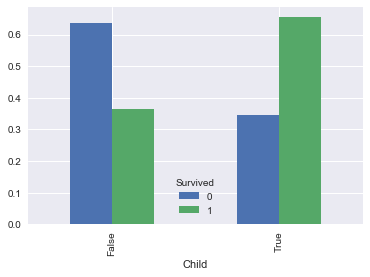

In [249]:
tab = pd.crosstab(train_df['Child'], train_df['Survived'])
dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind='bar')

# Name

In [193]:
for dataset in combine:
    dataset['FamilyName'] = dataset['Name'].str.extract(r'^(\w+)', expand=True)

In [194]:
name_counter = Counter(train_df['FamilyName'])

In [195]:
for dataset in combine:
    dataset['FamilyNameCount'] = dataset['FamilyName'].apply(lambda x: name_counter[x])

In [196]:
family_name_survival = train_df[train_df['FamilyNameCount'] >= 2].groupby(['FamilyName'])['Survived'].agg(['mean'])
lucky_family_name = set()
unlucky_family_name = set()
for name in family_name_survival.index:
    survival_rate = float(family_name_survival.loc[name])
    if survival_rate >= 0.5:
        lucky_family_name.add(name)
    else:
        unlucky_family_name.add(name)

In [197]:
for dataset in combine:
    dataset['LuckyFamilyName'] = dataset['FamilyName'].apply(lambda x: x in lucky_family_name)
    dataset['UnluckyFamilyName'] = dataset['FamilyName'].apply(lambda x: x in unlucky_family_name) 

# Machine Learning

In [273]:
all_features = ['Pclass_1', 'Pclass_2', 'Pclass_3',
                'Sex',
                'Age', 'Child',
                'IntFare', 'UpperClassLady', 'UnderDog','WealthyPeople',
                'Mr', 'Miss', 'Mrs', 'Master', 'Rare',
                'GoodFamilySize', 'BadFamilySize', 'IsAlone',
                'GoodCabin', 'BadCabin',
                'LuckyTicket', 'UnluckyTicket',
                'LuckyFamilyName', 'UnluckyFamilyName']

In [274]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

X_train = train_df[all_features]
Y_train = train_df['Survived']
X_test = test_df[all_features]

# # Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
acc_log = cross_val_score(logreg, X_train, Y_train, cv=10).mean()

# # Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
acc_gaussian = cross_val_score(gaussian, X_train, Y_train, cv=10).mean()

# # Support Vector Machines
svc = SVC()
svc.fit(X_train, Y_train)
acc_svc = cross_val_score(svc, X_train, Y_train, cv=10).mean()

# # KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
acc_knn = cross_val_score(knn, X_train, Y_train, cv=10).mean()

# # Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
acc_linear_svc = cross_val_score(linear_svc, X_train, Y_train, cv=10).mean()

# # Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
acc_decision_tree = cross_val_score(decision_tree, X_train, Y_train, cv=10).mean()

# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
random_forest.score(X_train, Y_train)
acc_random_forest = cross_val_score(random_forest, X_train, Y_train, cv=10).mean()

# # Gradient Boosting
gradient_boosting = GradientBoostingClassifier(n_estimators=100)
gradient_boosting.fit(X_train, Y_train)
gradient_boosting.score(X_train, Y_train)
acc_gradient_boosting = cross_val_score(gradient_boosting, X_train, Y_train, cv=10).mean()

models = pd.DataFrame({
    'Model': ['Support Vector Machines', 
              'KNN', 
              'Logistic Regression', 
              'Naive Bayes',
              'Random Forest', 
               'Linear SVC', 
              'Decision Tree' , 
              'Gradient Boosting'],
    'Score': [acc_svc, 
              acc_knn, 
              acc_log,
              acc_gaussian,
              acc_random_forest, 
              acc_linear_svc,
              acc_decision_tree, 
              acc_gradient_boosting]})
print(models.sort_values(by='Score', ascending=False))

                     Model     Score
7        Gradient Boosting  0.867525
2      Logistic Regression  0.863093
5               Linear SVC  0.854167
0  Support Vector Machines  0.852931
1                      KNN  0.842930
4            Random Forest  0.834977
6            Decision Tree  0.819359
3              Naive Bayes  0.816001


0.868661048689


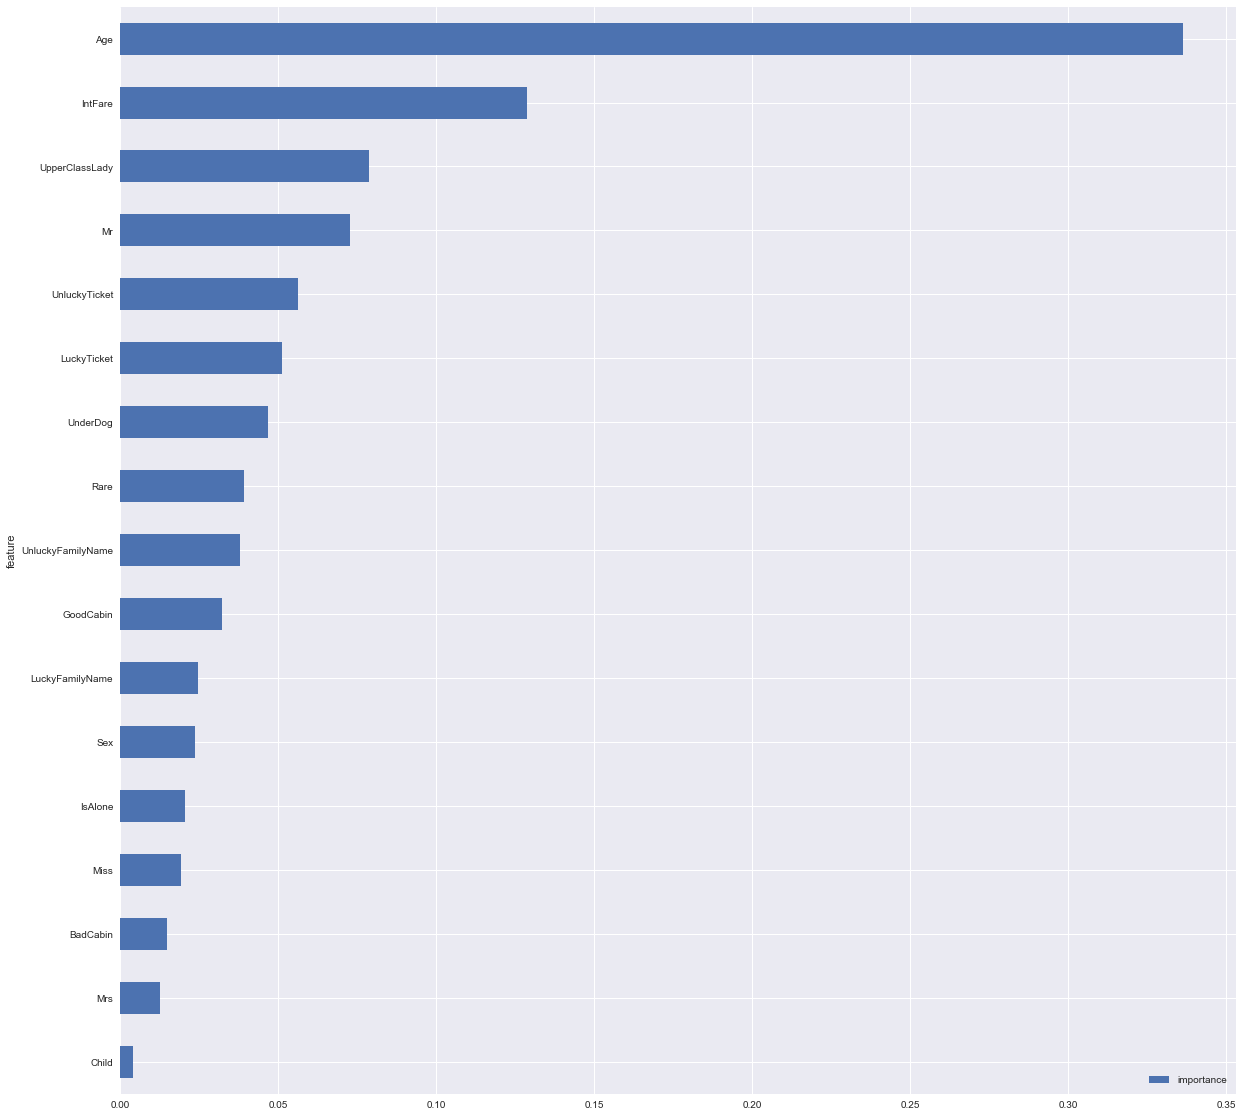

In [291]:
filtered_features = ['Sex',
                    'Age', 'Child',
                    'IntFare', 'UpperClassLady', 'UnderDog',
                    'Mr', 'Miss', 'Mrs', 'Rare',
                     'IsAlone',
                    'GoodCabin', 'BadCabin',
                    'LuckyTicket', 'UnluckyTicket',
                    'LuckyFamilyName', 'UnluckyFamilyName']

X_train = train_df[filtered_features]
Y_train = train_df['Survived']
X_test = test_df[filtered_features]

# # Gradient Boosting
gradient_boosting = GradientBoostingClassifier(n_estimators=100)
gradient_boosting.fit(X_train, Y_train)
gradient_boosting.score(X_train, Y_train)
print(cross_val_score(gradient_boosting, X_train, Y_train, cv=10).mean())
Y_pred = gradient_boosting.predict(X_test)

features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = gradient_boosting.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind='barh', figsize=(20, 20))

In [292]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('submission.csv', index=False)